In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline



In [5]:
weather_2012_final=pd.read_csv("/Users/shengyuchen/Dropbox/Engagement - Business/My Hub/AI:ML:DL Playground/Local Python/Python Data Manipulations/Pandas Cookbook/weather_2012.csv",
                              index_col="Date/Time",parse_dates=True)

In [6]:
weather_2012_final.head()

Temp (C)  Dew Point Temp (C)  Rel Hum (%)  \
Date/Time                                                        
2012-01-01 00:00:00      -1.8                -3.9           86   
2012-01-01 01:00:00      -1.8                -3.7           87   
2012-01-01 02:00:00      -1.8                -3.4           89   
2012-01-01 03:00:00      -1.5                -3.2           88   
2012-01-01 04:00:00      -1.5                -3.3           88   

                     Wind Spd (km/h)  Visibility (km)  Stn Press (kPa)  \
Date/Time                                                                
2012-01-01 00:00:00                4              8.0           101.24   
2012-01-01 01:00:00                4              8.0           101.24   
2012-01-01 02:00:00                7              4.0           101.26   
2012-01-01 03:00:00                6              4.0           101.27   
2012-01-01 04:00:00                7              4.8           101.23   

                                  Weather  
Date/Time                                  
2012-01-01 00:00:00                   Fog  
2012-01-01 01:00:00                   Fog  
2012-01-01 02:00:00  Freezing Drizzle,Fog  
2012-01-01 03:00:00  Freezing Drizzle,Fog  
2012-01-01 04:00:00                   Fog

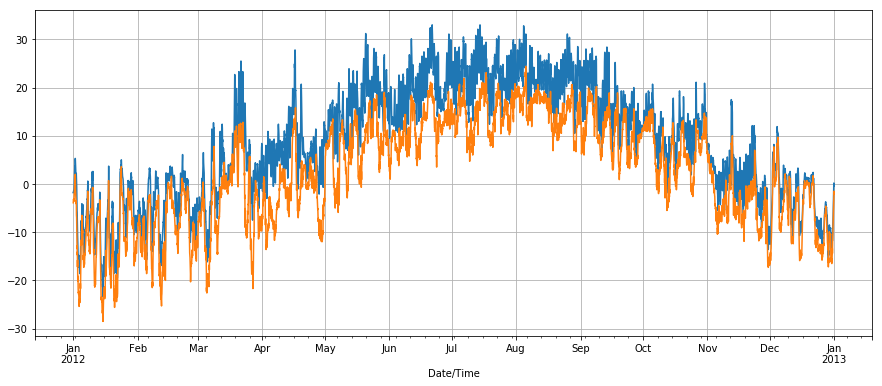

In [10]:
plt.figure(figsize=(15,3))
weather_2012_final['Temp (C)'].plot(figsize=(15,6))
weather_2012_final['Dew Point Temp (C)'].plot()
plt.grid()

# 5.1 Downloading one month of weather


In [38]:
url_template="http://climate.weather.gc.ca/climateData/bulkdata_e.html?format=csv&stationID=5415&Year={year}&Month={month}&timeframe=1&submit=Download+Data"
url=url_template.format(month=3,year=2017)
#This trick is pretty cool using format to manipulate with the strings
url="/Users/shengyuchen/Dropbox/Engagement - Business/My Hub/AI:ML:DL Playground/Local Python/Python Data Manipulations/Pandas Cookbook/dailyweather2017.csv"
weather_2017=pd.read_csv(url,skiprows=25,index_col="Date/Time",parse_dates=True,encoding='latin1')


In [39]:
weather_2017.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2017-01-01 to 2017-12-31
Data columns (total 26 columns):
Year                         365 non-null int64
Month                        365 non-null int64
Day                          365 non-null int64
Data Quality                 365 non-null object
Max Temp (ÃÂ°C)             350 non-null float64
Max Temp Flag                3 non-null object
Min Temp (ÃÂ°C)             351 non-null float64
Min Temp Flag                3 non-null object
Mean Temp (ÃÂ°C)            350 non-null float64
Mean Temp Flag               3 non-null object
Heat Deg Days (ÃÂ°C)        350 non-null float64
Heat Deg Days Flag           3 non-null object
Cool Deg Days (ÃÂ°C)        350 non-null float64
Cool Deg Days Flag           3 non-null object
Total Rain (mm)              349 non-null float64
Total Rain Flag              36 non-null object
Total Snow (cm)              349 non-null float64
Total Snow Flag              35 non-null object
To

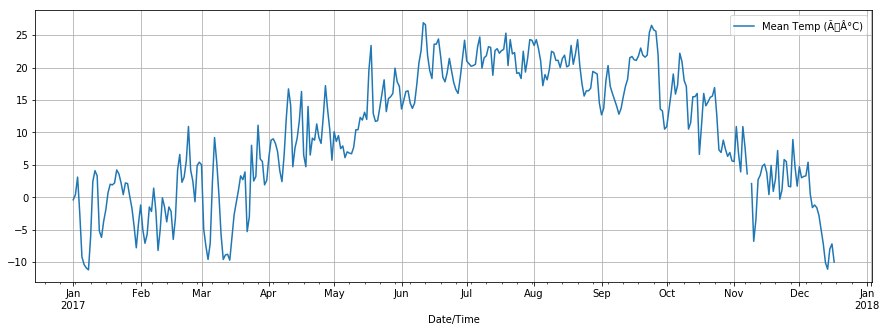

In [25]:
weather_2017["Mean Temp (ÃÂ°C)"].plot(figsize=(15,5));
plt.grid()
plt.legend()

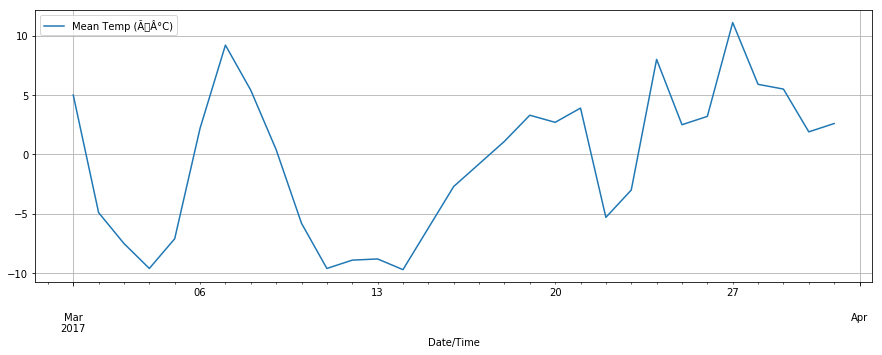

In [27]:
weather_2017_mar=weather_2017[weather_2017.Month==3]
weather_2017_mar["Mean Temp (ÃÂ°C)"].plot(figsize=(15,5));
plt.grid()
plt.legend()

In [28]:
# Replacing some of the column names to make it easy to type
weather_2017.columns=[s.replace(u"\xb0", '') for s in weather_2017.columns]

In [30]:
weather_2017=weather_2017.dropna(axis=1,how="any") 
#I don't know what the axis is doing here, what is how here?
weather_2017[:5]
#The axis=1 argument means dropping columsn. The default for operations
# like dropna and drop is always to operate on rows 

Year  Month  Day Data Quality
Date/Time                                
2017-01-01  2017      1    1       Ã¢ÂÂ¡
2017-01-02  2017      1    2       Ã¢ÂÂ¡
2017-01-03  2017      1    3       Ã¢ÂÂ¡
2017-01-04  2017      1    4       Ã¢ÂÂ¡
2017-01-05  2017      1    5       Ã¢ÂÂ¡

In [43]:
weather_2017=weather_2017.drop(["Year","Month","Day","Data Quality"],axis=1)


ValueError: labels ['Year' 'Month' 'Day' 'Data Quality'] not contained in axis

In [44]:
weather_2017

Max Temp (ÃÂ°C) Max Temp Flag  Min Temp (ÃÂ°C) Min Temp Flag  \
Date/Time                                                                    
2017-01-01               1.8           NaN              -2.5           NaN   
2017-01-02               4.8           NaN              -4.1           NaN   
2017-01-03               4.4           NaN               1.7           NaN   
2017-01-04               3.5           NaN              -8.5           NaN   
2017-01-05              -6.5           NaN             -11.9           NaN   
2017-01-06              -7.3           NaN             -13.4           NaN   
2017-01-07              -7.6           NaN             -14.2           NaN   
2017-01-08              -9.0           NaN             -13.4           NaN   
2017-01-09              -2.7           NaN              -9.5           NaN   
2017-01-10               7.8           NaN              -3.1           NaN   
2017-01-11               7.3           NaN               0.8           NaN   
2017-01-12               8.9           NaN              -2.3           NaN   
2017-01-13              -1.6           NaN              -8.8           NaN   
2017-01-14              -3.3           NaN              -9.1           NaN   
2017-01-15              -0.1           NaN              -7.2           NaN   
2017-01-16               2.6           NaN              -6.3           NaN   
2017-01-17               1.7           NaN              -0.3           NaN   
2017-01-18               3.3           NaN               0.7           NaN   
2017-01-19               2.9           NaN               0.9           NaN   
2017-01-20               3.7           NaN               0.7           NaN   
2017-01-21               6.3           NaN               2.0           NaN   
2017-01-22               5.4           NaN               1.8           NaN   
2017-01-23               3.9           NaN               0.5           NaN   
2017-01-24               1.4           NaN              -0.7           NaN   
2017-01-25               4.9           NaN              -0.6           NaN   
2017-01-26               4.0           NaN               0.2           NaN   
2017-01-27               1.8           NaN              -1.6           NaN   
2017-01-28              -0.9           NaN              -2.5           NaN   
2017-01-29              -1.8           NaN              -7.1           NaN   
2017-01-30              -4.6           NaN             -10.9           NaN   
...                      ...           ...               ...           ...   
2017-12-02               7.3           NaN              -1.3           NaN   
2017-12-03               8.0           NaN              -1.6           NaN   
2017-12-04               9.0           NaN              -2.4           NaN   
2017-12-05              11.6           NaN              -0.8           NaN   
2017-12-06               3.3           NaN              -2.4           NaN   
2017-12-07               0.8           NaN              -3.9           NaN   
2017-12-08               1.4           NaN              -3.8           NaN   
2017-12-09               1.0           NaN              -4.1           NaN   
2017-12-10              -1.6           NaN              -4.0           NaN   
2017-12-11              -2.7           NaN              -7.2           NaN   
2017-12-12              -2.6           NaN             -11.7           NaN   
2017-12-13              -7.3           NaN             -12.9           NaN   
2017-12-14              -6.3           NaN             -15.8           NaN   
2017-12-15              -4.0           NaN             -11.9           NaN   
2017-12-16              -4.0           NaN             -10.3           NaN   
2017-12-17              -6.4           NaN             -13.5           NaN   
2017-12-18               NaN           NaN               NaN           NaN   
2017-12-19               NaN           NaN               NaN           NaN   
2017-12-20               NaN      

# After all of these, save to CSV

In [45]:
weather_2017.to_csv("/Users/shengyuchen/Dropbox/Engagement - Business/My Hub/AI:ML:DL Playground/Local Python/Python Data Manipulations/Pandas Cookbook/adj.csv")